In [176]:
#import

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import mplcursors
from scipy.stats import norm

from scipy.stats import ttest_ind
from scipy.stats import f_oneway

In [177]:
# Loading the data
data_collection = pd.read_csv('C:/Users/ashwi/Documents/LighthouseLabs/Data Analysis/Capstone Project/capstone/data/1/data_collection.csv')
pen_by_pos = pd.read_csv('C:/Users/ashwi/Documents/LighthouseLabs/Data Analysis/Capstone Project/capstone/data/1/pen_by_pos.csv')
pen_by_pos_2 = pd.read_csv('C:/Users/ashwi/Documents/LighthouseLabs/Data Analysis/Capstone Project/capstone/data/1/pen_by_pos_2.csv')

# Understanding the data
- check first rows using .head(1)
- check shape using .shape()
- check data types using .info()

In [178]:
data_collection.head(1)

,name,team,pos,penalty_name,penalty_yards,total_penalty_yards_by_position,total_penalty_yards_by_player,total_penalty_yards_by_team
0,A.Gurode,Dallas,C,Defensive Pass Interference,220,3821,456,3299


In [179]:
data_collection.shape

(3540, 8)

In [180]:
data_collection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3540 entries, 0 to 3539
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   name                             3540 non-null   object
 1   team                             3540 non-null   object
 2   pos                              3540 non-null   object
 3   penalty_name                     3540 non-null   object
 4   penalty_yards                    3540 non-null   int64 
 5   total_penalty_yards_by_position  3540 non-null   int64 
 6   total_penalty_yards_by_player    3540 non-null   int64 
 7   total_penalty_yards_by_team      3540 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 221.4+ KB


In [181]:
pen_by_pos.head(1)

,pos,count_by_pos,total_penalty_yards_by_position
0,WR,300,8360


In [182]:
pen_by_pos.shape

(24, 3)

In [183]:
pen_by_pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   pos                              24 non-null     object
 1   count_by_pos                     24 non-null     int64 
 2   total_penalty_yards_by_position  24 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 708.0+ bytes


In [184]:
pen_by_pos_2.head(1)

,name,team,player_position,penalty_name,penalty_yards
0,A.Gurode,Dallas,C,Defensive Pass Interference,220


In [185]:
pen_by_pos_2.shape

(3582, 5)

In [186]:
pen_by_pos_2.info

<bound method DataFrame.info of            name       team player_position  \
0      A.Gurode     Dallas               C   
1      A.Gurode     Dallas               C   
2      A.Gurode     Dallas               C   
3      A.Gurode     Dallas               C   
4      A.Gurode     Dallas               C   
...         ...        ...             ...   
3577    T.Owens    Buffalo              WR   
3578    T.Owens    Buffalo              WR   
3579  T.Watkins    Oakland              WR   
3580  V.Jackson  San Diego              WR   
3581   W.Wright  N.Y. Jets              WR   

                               penalty_name  penalty_yards  
0               Defensive Pass Interference            220  
1                     Illegal Receiver Pass              0  
2                   Kick Catch Interference              0  
3                 Invalid Fair Catch Signal              0  
4                          Disqualification             15  
...                                     ...      

# Basic Summary statistics

## .describe()
- to get summary statistics of numerical columns

In [187]:
data_collection.describe()

,penalty_yards,total_penalty_yards_by_position,total_penalty_yards_by_player,total_penalty_yards_by_team
count,3540.000000,3540.000000,3540.000000,3540.000000
mean,21.601130,5302.134181,100.241808,2424.361582
std,54.764808,2516.942320,145.343062,524.540196
min,0.000000,5.000000,0.000000,1152.000000
25%,0.000000,2902.000000,10.000000,2119.000000
50%,0.000000,5606.000000,41.000000,2483.000000
75%,15.000000,7932.000000,131.000000,2779.000000
max,480.000000,8360.000000,843.000000,3435.000000


In [188]:
pen_by_pos.describe()

,count_by_pos,total_penalty_yards_by_position
count,24.000000,24.000000
mean,147.500000,3186.166667
std,123.996494,2823.355892
min,1.000000,5.000000
25%,33.000000,745.500000
50%,113.500000,2569.500000
75%,241.750000,5216.000000
max,438.000000,8360.000000


In [189]:
pen_by_pos_2.describe()

,penalty_yards
count,3582.000000
mean,21.353434
std,54.490805
min,0.000000
25%,0.000000
50%,0.000000
75%,15.000000
max,480.000000


# Find and Handle Missing Values

print(df.isnull().sum())
- Handle missing value
- df.dropna(inplace=True)
- df.fillna(0, inplace=True)

In [190]:
print(data_collection.isnull().sum())

name                               0
team                               0
pos                                0
penalty_name                       0
penalty_yards                      0
total_penalty_yards_by_position    0
total_penalty_yards_by_player      0
total_penalty_yards_by_team        0
dtype: int64


In [191]:
print(pen_by_pos.isnull().sum())

pos                                0
count_by_pos                       0
total_penalty_yards_by_position    0
dtype: int64


In [192]:
print(pen_by_pos_2.isnull().sum())

name               0
team               0
player_position    0
penalty_name       0
penalty_yards      0
dtype: int64


# Relationship Statistics

## Histogram

### pen_by_pos

In [193]:
pen_by_pos.columns

Index(['pos', 'count_by_pos', 'total_penalty_yards_by_position'], dtype='object')

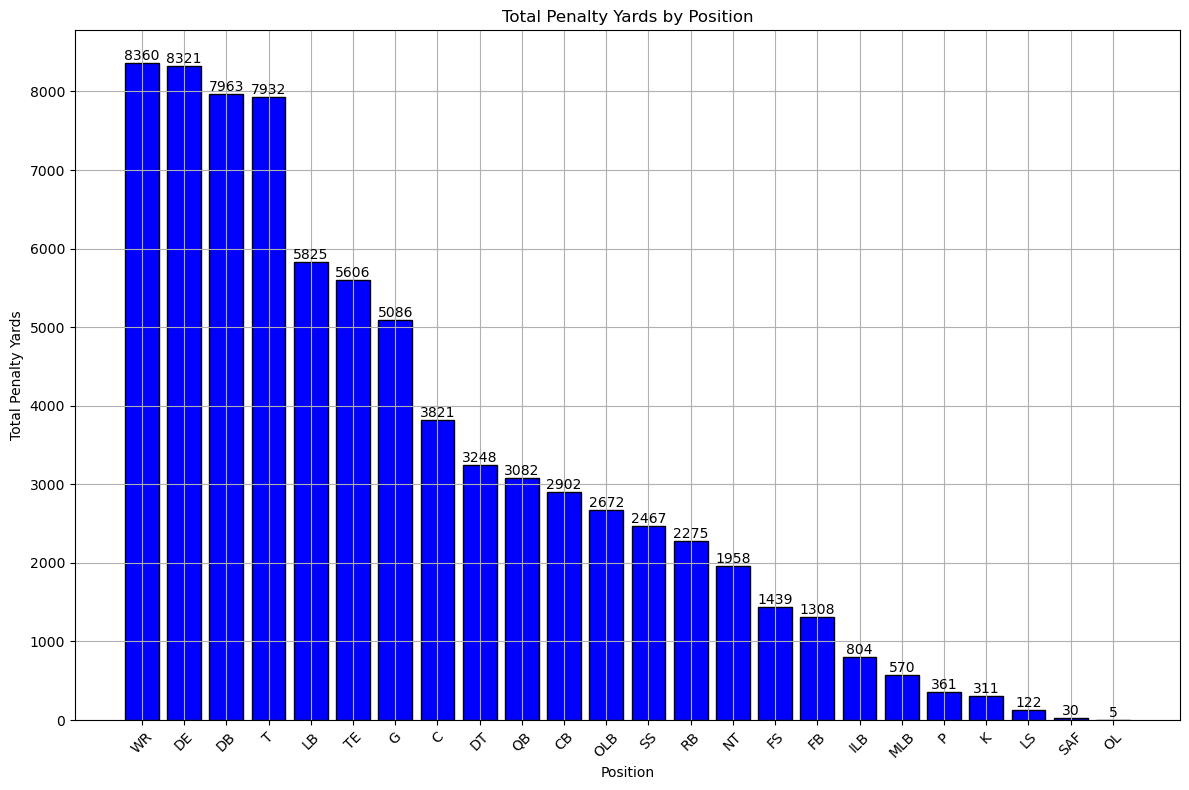

In [194]:
# Sort the DataFrame by 'total_penalty_yards_by_position' column in descending order
pen_by_pos_sorted = pen_by_pos.sort_values(by='total_penalty_yards_by_position', ascending=False)

plt.figure(figsize=(12, 8))  # Set the size of the figure to 12 inches wide and 8 inches tall

# Create a bar plot for the total penalty yards by position
bars = plt.bar(pen_by_pos_sorted['pos'], pen_by_pos_sorted['total_penalty_yards_by_position'], color='blue', edgecolor='black')

plt.xlabel('Position')
plt.ylabel('Total Penalty Yards')
plt.title('Total Penalty Yards by Position')
plt.xticks(rotation=45)
plt.grid(True)

# Set y-axis ticks to range from 0 to 9000 by 1000s
plt.yticks(np.arange(0, 8400, 1000))

plt.tight_layout()

# Add value tooltips
mplcursors.cursor(bars, hover=True).connect("add", lambda sel: sel.annotation.set_text(f"Yards: {sel.artist.get_height()}"))

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom')

plt.show()

Thoughts
- What were the top 3 penalty_name per position

In [195]:
data_collection.columns

Index(['name', 'team', 'pos', 'penalty_name', 'penalty_yards',
       'total_penalty_yards_by_position', 'total_penalty_yards_by_player',
       'total_penalty_yards_by_team'],
      dtype='object')

In [196]:
bar_q1 = data_collection.sort_values(by=['total_penalty_yards_by_position', 'penalty_yards'], ascending=[False, False])
bar_q1 = bar_q1.reset_index(drop=True)
bar_q1.head(3)

,name,team,pos,penalty_name,penalty_yards,total_penalty_yards_by_position,total_penalty_yards_by_player,total_penalty_yards_by_team
0,S.Breaston,Arizona,WR,Offensive Holding,425,8360,480,2580
1,S.Johnson,Buffalo,WR,Defensive Pass Interference,403,8360,616,2445
2,B.Edwards,N.Y. Jets,WR,Offensive Holding,393,8360,488,2426


### Total Penalty Count by Position

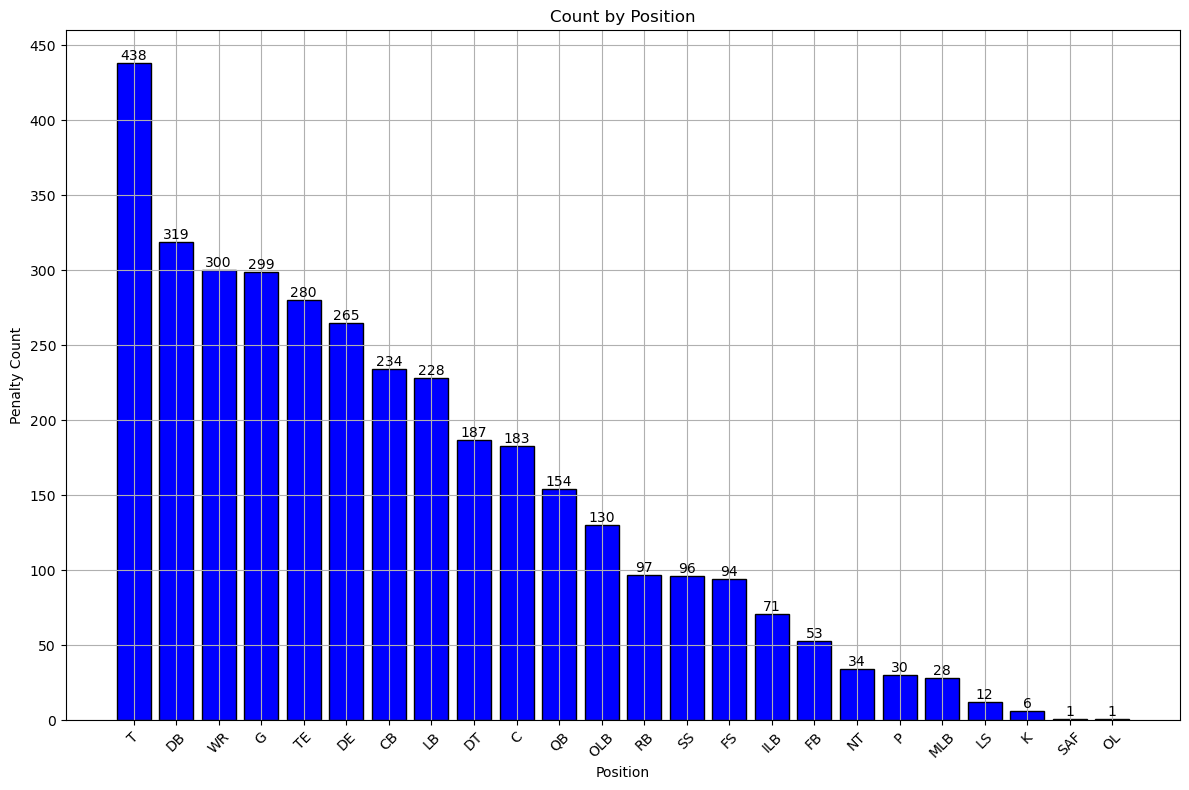

In [197]:
import mplcursors

# Sort the DataFrame by 'count_by_pos' column in descending order
pen_by_pos_sorted = pen_by_pos.sort_values(by='count_by_pos', ascending=False)

plt.figure(figsize=(12, 8))  # Set the size of the figure to 12 inches wide and 8 inches tall

# Create a bar plot for the count by position
bars = plt.bar(pen_by_pos_sorted['pos'], pen_by_pos_sorted['count_by_pos'], color='blue', edgecolor='black')

plt.xlabel('Position')
plt.ylabel('Penalty Count')
plt.title('Count by Position')
plt.xticks(rotation=45)
plt.grid(True)

# Set y-axis ticks to range from 0 to 450 by 50
plt.yticks(np.arange(0, 451, 50))

plt.tight_layout()

# Add value tooltips
mplcursors.cursor(bars, hover=True).connect("add", lambda sel: sel.annotation.set_text(f"Count: {sel.artist.get_height()}"))

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom')

plt.show()

## Scatter Plots

### pen_by_pos

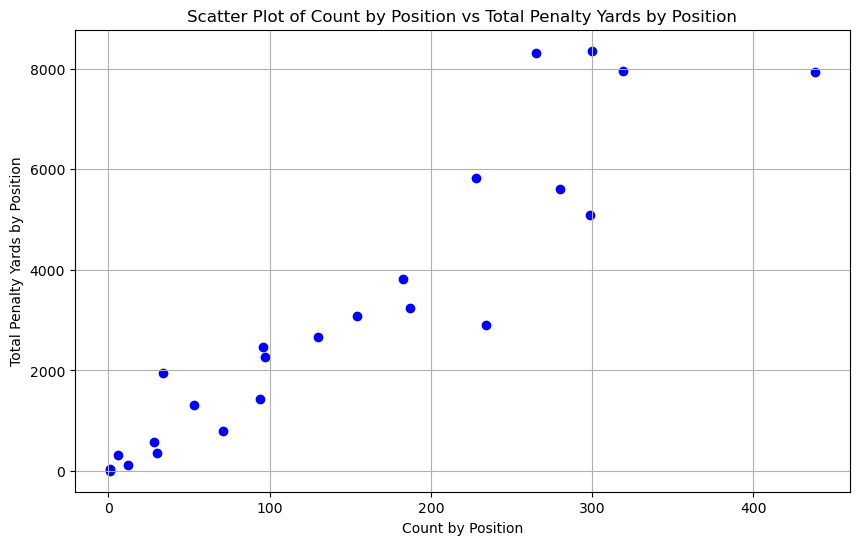

C:\Users\ashwi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ashwi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


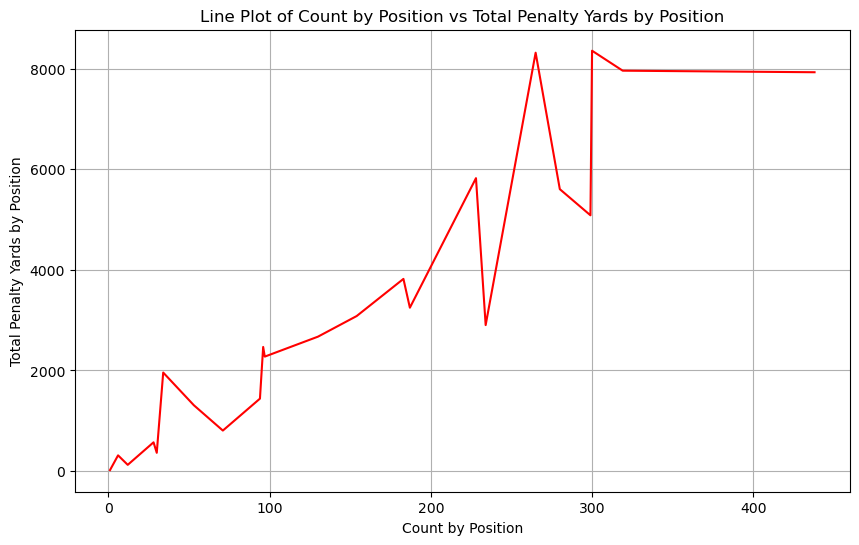

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pen_by_pos['count_by_pos'], pen_by_pos['total_penalty_yards_by_position'], color='blue')
plt.xlabel('Count by Position')
plt.ylabel('Total Penalty Yards by Position')
plt.title('Scatter Plot of Count by Position vs Total Penalty Yards by Position')
plt.grid(True)
plt.show()

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='count_by_pos', y='total_penalty_yards_by_position', data=pen_by_pos, color='red')
plt.xlabel('Count by Position')
plt.ylabel('Total Penalty Yards by Position')
plt.title('Line Plot of Count by Position vs Total Penalty Yards by Position')
plt.grid(True)
plt.show()

In [199]:
import numpy as np
import scipy.stats as stats

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(pen_by_pos['count_by_pos'], pen_by_pos['total_penalty_yards_by_position'])[0, 1]
print("Correlation Coefficient:", correlation_coefficient)

# Calculate other descriptive statistics
mean_count_by_pos = pen_by_pos['count_by_pos'].mean()
mean_penalty_yards = pen_by_pos['total_penalty_yards_by_position'].mean()
std_count_by_pos = pen_by_pos['count_by_pos'].std()
std_penalty_yards = pen_by_pos['total_penalty_yards_by_position'].std()

print("Mean Count by Position:", mean_count_by_pos)
print("Mean Total Penalty Yards by Position:", mean_penalty_yards)
print("Standard Deviation of Count by Position:", std_count_by_pos)
print("Standard Deviation of Total Penalty Yards by Position:", std_penalty_yards)

Correlation Coefficient: 0.9302708054601119
Mean Count by Position: 147.5
Mean Total Penalty Yards by Position: 3186.1666666666665
Standard Deviation of Count by Position: 123.99649363906468
Standard Deviation of Total Penalty Yards by Position: 2823.3558919756506


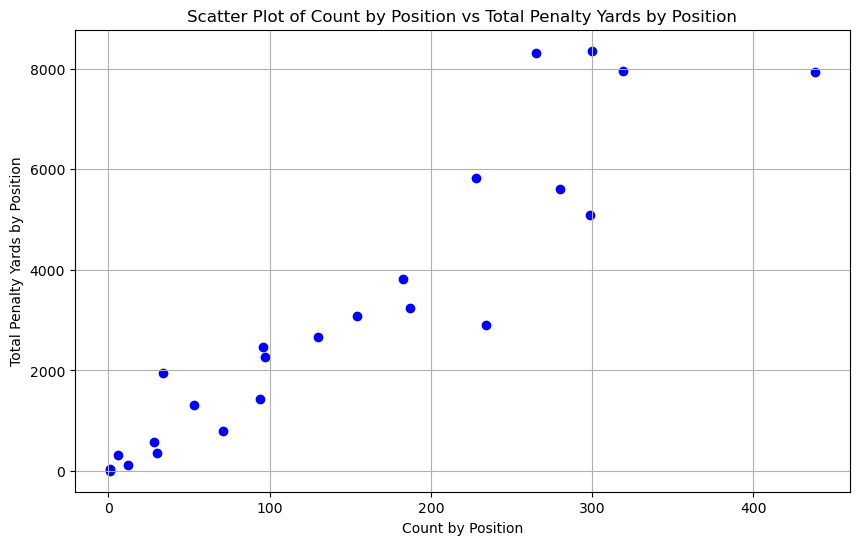

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pen_by_pos['count_by_pos'], pen_by_pos['total_penalty_yards_by_position'], color='blue')
plt.xlabel('Count by Position')
plt.ylabel('Total Penalty Yards by Position')
plt.title('Scatter Plot of Count by Position vs Total Penalty Yards by Position')
plt.grid(True)
plt.show()

C:\Users\ashwi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ashwi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


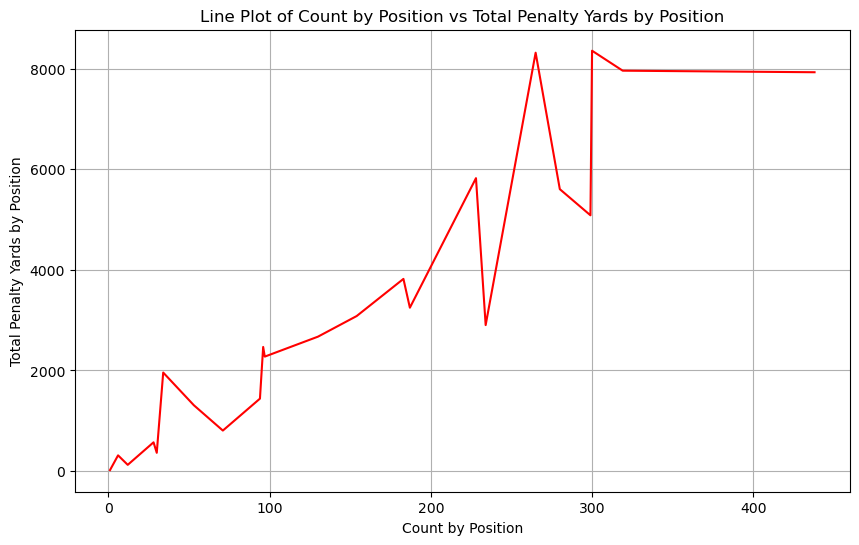

In [201]:
# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='count_by_pos', y='total_penalty_yards_by_position', data=pen_by_pos, color='red')
plt.xlabel('Count by Position')
plt.ylabel('Total Penalty Yards by Position')
plt.title('Line Plot of Count by Position vs Total Penalty Yards by Position')
plt.grid(True)
plt.show()

# Correlation Analysis

## pen_by_pos

In [202]:
pen_by_pos.dtypes

pos                                object
count_by_pos                        int64
total_penalty_yards_by_position     int64
dtype: object

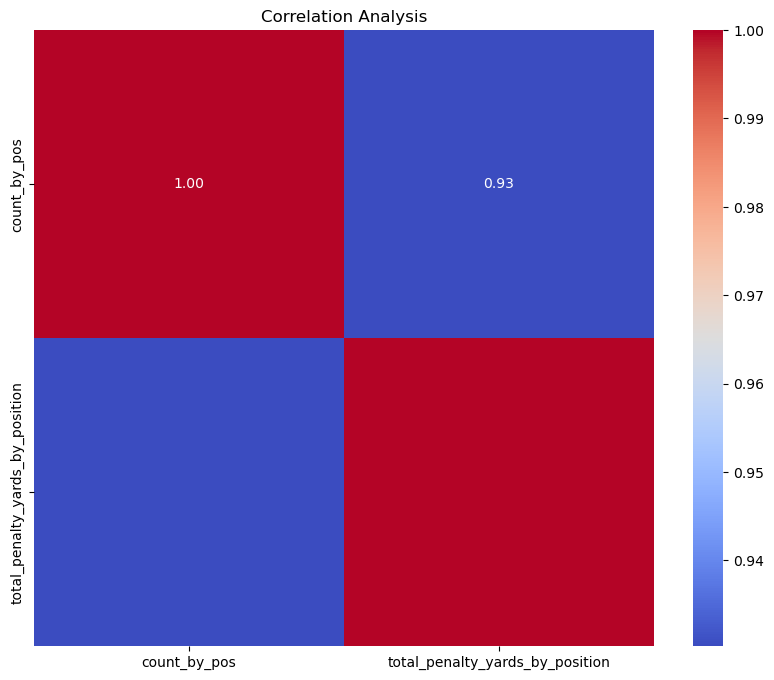

In [203]:
# Exclude the 'pos' column from the DataFrame
pen_by_pos_numeric = pen_by_pos.drop(columns=['pos'])

# Calculate correlation matrix
correlation_matrix = pen_by_pos_numeric.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Analysis')
plt.show()

In [204]:
# Calculate correlation matrix
correlation_matrix = pen_by_pos_numeric.corr()

# Print correlation analysis
print("Correlation Analysis:")
print(correlation_matrix.describe())

Correlation Analysis:
       count_by_pos  total_penalty_yards_by_position
count      2.000000                         2.000000
mean       0.965135                         0.965135
std        0.049306                         0.049306
min        0.930271                         0.930271
25%        0.947703                         0.947703
50%        0.965135                         0.965135
75%        0.982568                         0.982568
max        1.000000                         1.000000


Correlation Coefficients between variables in pen_by_pos

1 : strong positive correlation
- as one variable increases, the other variable also tends to increase

-1 : strong negative correlation
- as one variable increases, the other variable tends to decrease

0 : no linear correlation between the variables

Colour: represent the strength and direction of the correlation
- Darker shades of red indicate a strong positive correlation
- Darker shades of blue indicate a strong negative correlation
- Lighter shades (closer to white) indicate little to no correlation

Correlation Coefficient Outcome
- 1 : strong positive correlation
- Darker shades of red indicate a strong positive correlation

# Outlier Detection

## Boxplot

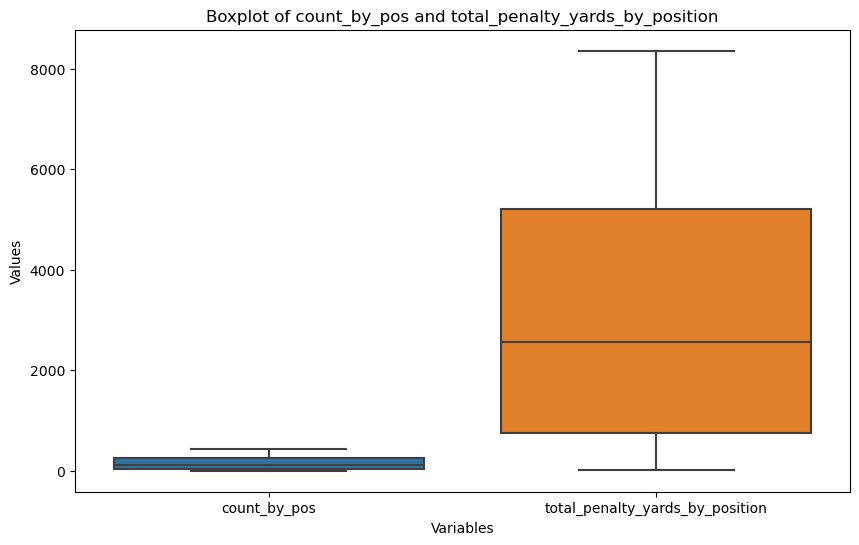

In [205]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pen_by_pos[['count_by_pos','total_penalty_yards_by_position']])
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Boxplot of count_by_pos and total_penalty_yards_by_position')
plt.show()

C:\Users\ashwi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ashwi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


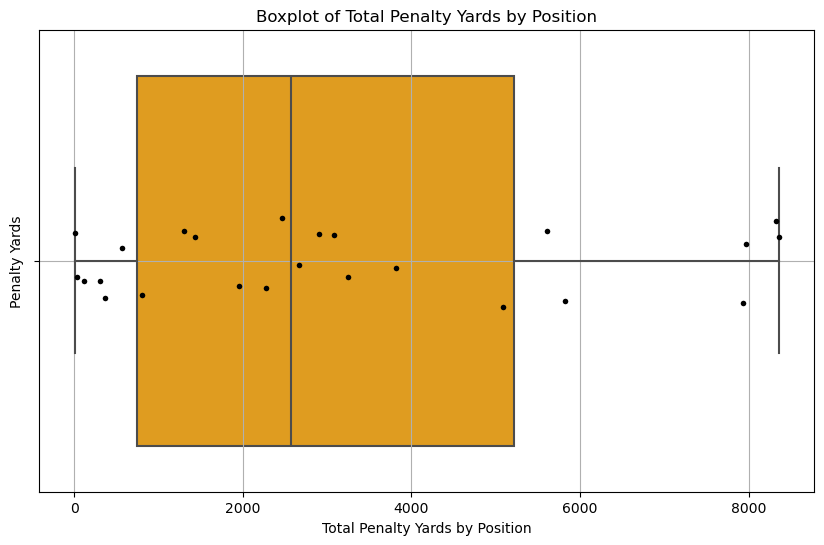

In [206]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=pen_by_pos['total_penalty_yards_by_position'], color='orange')  # Set boxplot color to orange
sns.stripplot(x=pen_by_pos['total_penalty_yards_by_position'], color='black', size=4)  # Overlay stripplot
plt.xlabel('Total Penalty Yards by Position')
plt.ylabel('Penalty Yards')
plt.title('Boxplot of Total Penalty Yards by Position')
plt.grid(True)
plt.show()


No outliers outside of Quartile 1 and Quartile 3; however some on the lines

Most values inside of the boxplot

C:\Users\ashwi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ashwi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


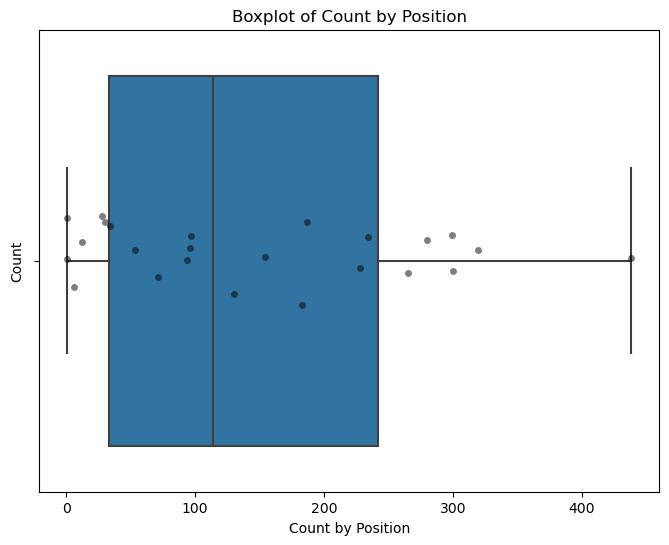

In [207]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x=pen_by_pos['count_by_pos'])
sns.stripplot(x=pen_by_pos['count_by_pos'], color='black', alpha=0.5)

# Add labels and details
plt.xlabel('Count by Position')
plt.ylabel('Count')
plt.title('Boxplot of Count by Position')

# Add median values on the plot
for i, box in enumerate(ax.artists):
    # Get the median value for each box
    median_val = pen_by_pos['count_by_pos'].median()
    # Position text annotation on the median value
    ax.text(i, median_val, f'{median_val}', 
            ha='center', va='bottom', color='black', fontsize=10)

# Display the plot
plt.show()


No outliers outside of Quartile 1 and Quartile 3; however some data points on the lines

Most values inside of the boxplot

## Bell Curve (Normal Distribution)

In [208]:
pen_by_pos.columns

Index(['pos', 'count_by_pos', 'total_penalty_yards_by_position'], dtype='object')

C:\Users\ashwi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


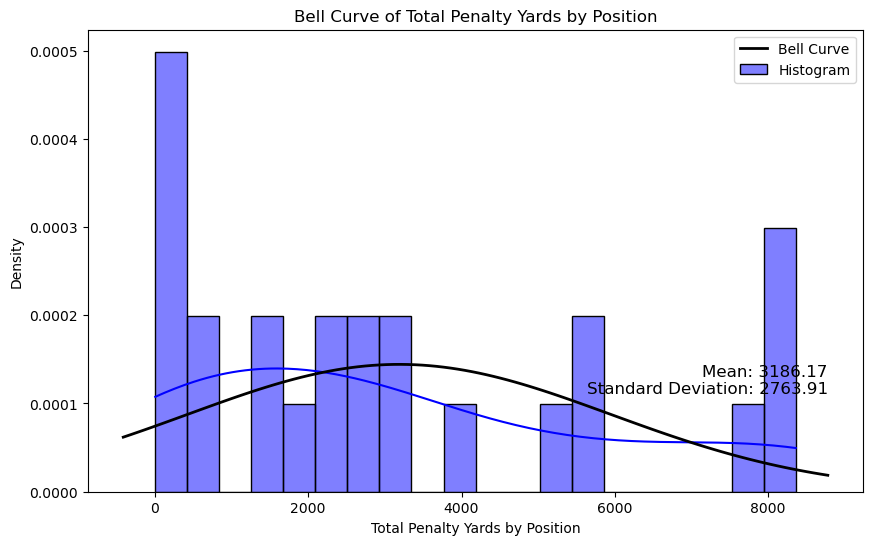

In [214]:
# Generate data from the 'total_penalty_yards_by_position' column in pen_by_pos DataFrame
data = pen_by_pos['total_penalty_yards_by_position']

# Fit a normal distribution to the data
mu, std = norm.fit(data)

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, stat="density", color='blue', bins=20, label='Histogram')  # Add label for the histogram

# Plot the bell curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Bell Curve')  # Add label for the bell curve

# Add labels and title
plt.xlabel('Total Penalty Yards by Position')  # X-axis label
plt.ylabel('Density')  # Y-axis label
plt.title('Bell Curve of Total Penalty Yards by Position')  # Plot title

# Show the legend
plt.legend()

# Add label for bell curve
plt.text(x.max(), p.max(), f"Mean: {mu:.2f}\nStandard Deviation: {std:.2f}", verticalalignment='top', horizontalalignment='right', fontsize=12)

# Show the plot
plt.show()

Mean: 3186.17
Standard Deviation: 2763.91

C:\Users\ashwi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


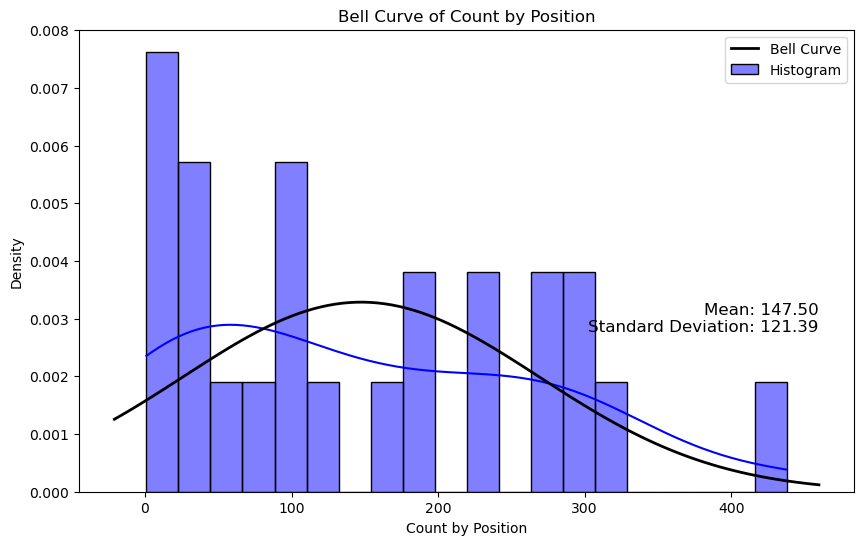

In [210]:
# Generate data from the 'count_by_pos' column in pen_by_pos DataFrame
data = pen_by_pos['count_by_pos']

# Fit a normal distribution to the data
mu, std = norm.fit(data)

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, stat="density", color='blue', bins=20, label='Histogram')  # Add label for the histogram

# Plot the bell curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Bell Curve')

# Add labels and title
plt.xlabel('Count by Position')  # Update x-axis label
plt.ylabel('Density')
plt.title('Bell Curve of Count by Position')  # Update plot title

# Add line labels
plt.text(x.max(), p.max(), f"Mean: {mu:.2f}\nStandard Deviation: {std:.2f}", verticalalignment='top', horizontalalignment='right', fontsize=12)

# Show the legend
plt.legend()

# Show the plot
plt.show()

Mean: 147.50
Standard Deviation: 121.39

In [211]:
# Comparing penalty distributions between player positions

In [212]:
'''
# Define the player positions to compare
positions = pen_by_pos['pos'].unique()
# Perform independent t-tests between pairs of player positions
for i in range(len(positions)):
    for j in range(i+1, len(positions)):
        pos1 = positions[i]
        pos2 = positions[j]
        
        # Filter data for the two player positions
        data_pos1 = pen_by_pos[pen_by_pos['pos'] == pos1]['total_penalty_yards_by_position']
        data_pos2 = pen_by_pos[pen_by_pos['pos'] == pos2]['total_penalty_yards_by_position']
        
        # Perform independent t-test
        t_statistic, p_value = ttest_ind(data_pos1, data_pos2)
        
        # Print the results
        print(f"Comparison between {pos1} and {pos2}:")
        print("T-statistic:", t_statistic)
        print("P-value:", p_value)
        if p_value < 0.05:
            print("Statistically significant difference (p < 0.05)")
        else:
            print("No statistically significant difference (p >= 0.05)")
        print("\n")
'''

'\n# Define the player positions to compare\npositions = pen_by_pos[\'pos\'].unique()\n# Perform independent t-tests between pairs of player positions\nfor i in range(len(positions)):\n    for j in range(i+1, len(positions)):\n        pos1 = positions[i]\n        pos2 = positions[j]\n        \n        # Filter data for the two player positions\n        data_pos1 = pen_by_pos[pen_by_pos[\'pos\'] == pos1][\'total_penalty_yards_by_position\']\n        data_pos2 = pen_by_pos[pen_by_pos[\'pos\'] == pos2][\'total_penalty_yards_by_position\']\n        \n        # Perform independent t-test\n        t_statistic, p_value = ttest_ind(data_pos1, data_pos2)\n        \n        # Print the results\n        print(f"Comparison between {pos1} and {pos2}:")\n        print("T-statistic:", t_statistic)\n        print("P-value:", p_value)\n        if p_value < 0.05:\n            print("Statistically significant difference (p < 0.05)")\n        else:\n            print("No statistically significant differen

In [213]:
'''
# Extract penalty yards data for each player position
penalty_yards_by_position = []
for position in pen_by_pos['pos'].unique():
    penalty_yards_by_position.append(pen_by_pos[pen_by_pos['pos'] == position]['total_penalty_yards_by_position'])

# Perform ANOVA test
f_statistic, p_value = f_oneway(*penalty_yards_by_position)

print("ANOVA F-statistic:", f_statistic)
print("ANOVA p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There are significant differences in penalty distributions between player positions.")
else:
    print("Fail to reject null hypothesis: There are no significant differences in penalty distributions between player positions.")
'''

'\n# Extract penalty yards data for each player position\npenalty_yards_by_position = []\nfor position in pen_by_pos[\'pos\'].unique():\n    penalty_yards_by_position.append(pen_by_pos[pen_by_pos[\'pos\'] == position][\'total_penalty_yards_by_position\'])\n\n# Perform ANOVA test\nf_statistic, p_value = f_oneway(*penalty_yards_by_position)\n\nprint("ANOVA F-statistic:", f_statistic)\nprint("ANOVA p-value:", p_value)\n\n# Interpret the results\nalpha = 0.05\nif p_value < alpha:\n    print("Reject null hypothesis: There are significant differences in penalty distributions between player positions.")\nelse:\n    print("Fail to reject null hypothesis: There are no significant differences in penalty distributions between player positions.")\n'